# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive 
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Almabetter/Module 04 ML/housing.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
list_of_strings = df.iloc[:,0]


In [ ]:
def convert_to_list_of_float(k):
  s=[]
  for i in k:
    n=float(i)
    s.append(n)
  return (s)

In [ ]:
# Nested list of Floats
a=[]
for i in range(len(list_of_strings)):
  a.append(convert_to_list_of_float(list_of_strings[i].split()))
print(a)

[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [ ]:
new_df= pd.DataFrame(data= a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [ ]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
dependent_variable = "MEDV"

In [ ]:
independent_variable = list(set(new_df.columns.tolist()) - {dependent_variable})
independent_variable

['DIS',
 'ZN',
 'CHAS',
 'TAX',
 'B',
 'PTRATIO',
 'RM',
 'LSTAT',
 'AGE',
 'CRIM',
 'NOX',
 'INDUS',
 'RAD']

In [ ]:
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [ ]:
def create_polynomial_regression_model():
  "creating the polynomial regression model for the given degree"
  fig, axs = plt.subplots(5,3, figsize = (15, 30))

  # j and k is for iterating through axis in subplot
  j=0
  k=-1

  
  for i in independent_variable:
    #setting title for the plot
    title = i

    #creating the independent variable data
    X = new_df[i].values
    X = np.array(X).reshape((len(X), 1))

    #creating the dependent variable data
    y = new_df[dependent_variable].values


    # Splitting the data into the train and test
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

    
    degree = 1
    train_error_list = [] #Storing training error for each degree
    test_error_list = []
    degree_list = [1,2,3,4,5,6,7,8,9,10] # Storing all the degree

    while degree <= 10:
      # Defining the degree for the polynomial feature
      poly_features = PolynomialFeatures( degree = degree)

      # Transforming the existing feature into the higher degree polynomial feature. 
      X_train_poly = poly_features.fit_transform(X_train)

      y_test_poly = poly_features.fit_transform(X_test)

      # Fit the Transformer features into the Linear Regression
      poly_model = LinearRegression()
      poly_model.fit(X_train_poly, y_train)

      # Predicting the training data_set for both y_train and y_test
      y_train_predicted = poly_model.predict(X_train_poly)
      y_test_predicted = poly_model.predict(y_test_poly)

      # Evaluating the model on training the dataset
      rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
      train_error_list.append(rmse_train)

      # Evaluating the model on test dataset
      rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
      test_error_list.append(rmse_test)


      
      #Providing the values for the degree to iterate
      degree = degree + 1
    # Updating the value for the j and k for the subplot
    k =  k + 1
    if k> 2:
      k = 0
      j = j + 1
    axs[j,k].plot(degree_list,train_error_list,color='green',label='Train_Error')
    axs[j,k].plot(degree_list,test_error_list,color='red',linestyle='--',linewidth=1.0,label='Test_Error')
    axs[j,k].set_title(title)
    axs[j,k].legend()
  for ax in axs.flat:
    ax.set(xlabel='Model Complexity', ylabel='RMSE')




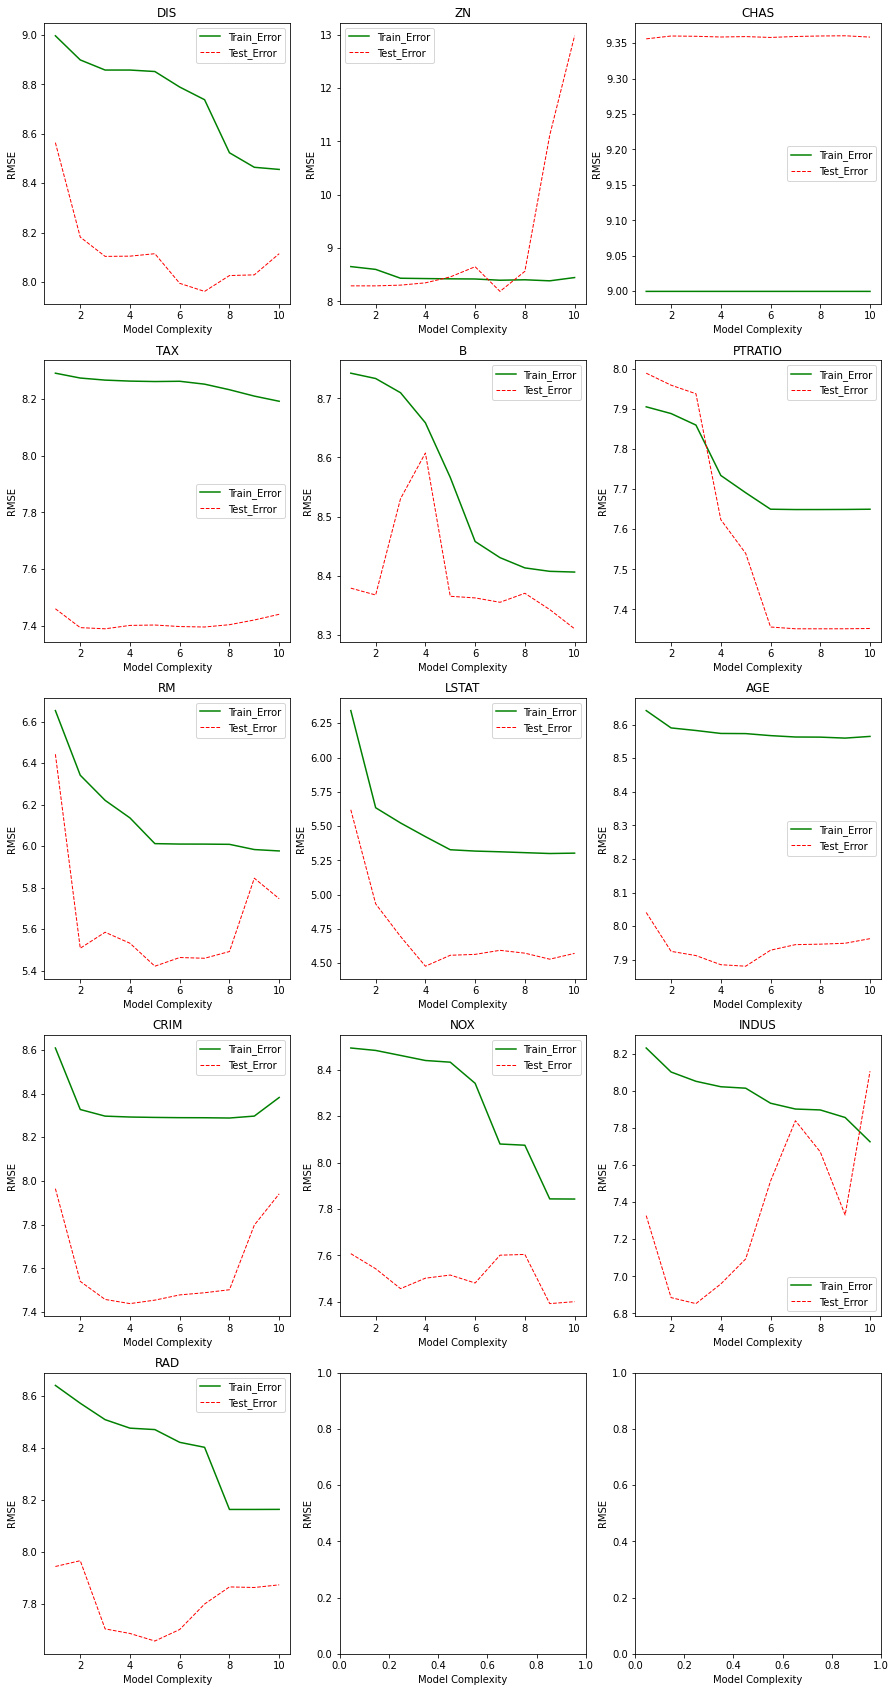

In [ ]:
create_polynomial_regression_model()